# ベルヌーイ分布とベルヌーイ試行、および二項分布

- ベルヌーイ試行：「成功」または「失敗」の二つの結果がある試行。成功確率$p$があり、何度試行を繰り返してもその確率は変わらない（独立している）
- ベルヌーイ分布：「１回のベルヌーイ試行」の結果を表す確率分布
- 二項分布：ベルヌーイ試行を複数回繰り返した時の成功回数を表す分布（言い換えると「ベルヌーイ分布を繰り返し適用して結果を集計したもの」）

以下のコードは成功確率$p$が$0.3$のベルヌーイ分布を示すバーグラフを表示します。

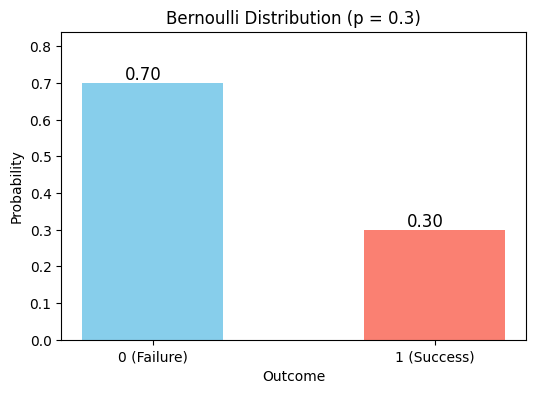

Animation saved as bernoulli_animation.gif


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameter settings
p = 0.3  # Success probability
x = np.array([0, 1])
pmf = np.array([1 - p, p])  # Theoretical probability mass function

# --- Static Graph ---
def plot_static():
    plt.figure(figsize=(6, 4))
    plt.bar(x, pmf, color=['skyblue', 'salmon'], width=0.5)
    plt.xticks(x, ['0 (Failure)', '1 (Success)'])
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.title(f'Bernoulli Distribution (p = {p})')
    plt.ylim(0, max(pmf) * 1.2)
    # Display probability values on top of each bar
    for i, prob in enumerate(pmf):
        plt.text(x[i] - 0.1, prob + 0.01, f'{prob:.2f}', fontsize=12)
    plt.show()

# --- Dynamic Animation ---
def animate_bernoulli(num_trials=50, gif_filename='bernoulli_animation.gif'):
    outcomes = []  # List to store trial outcomes
    counts = {0: 0, 1: 0}  # Count for each outcome

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(x, [0, 0], color=['skyblue', 'salmon'], width=0.5)
    ax.set_xticks(x)
    ax.set_xticklabels(['0 (Failure)', '1 (Success)'])
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Relative Frequency')
    ax.set_ylim(0, 1)
    title = ax.set_title('Bernoulli Trial: n = 0')
    # Additional text to display counts (placed near the top center)
    count_text = ax.text(0.5, 0.95, '', transform=ax.transAxes, ha='center', fontsize=12)

    def update(frame):
        # New trial outcome: 1 if random number < p, else 0
        outcome = 1 if np.random.rand() < p else 0
        outcomes.append(outcome)
        counts[outcome] += 1
        total = len(outcomes)
        # Compute relative frequencies for each outcome
        rel_freq_0 = counts[0] / total
        rel_freq_1 = counts[1] / total
        bars[0].set_height(rel_freq_0)
        bars[1].set_height(rel_freq_1)
        title.set_text(f'Bernoulli Trial: n = {total}')
        count_text.set_text(f'Failures: {counts[0]}, Successes: {counts[1]}')
        # Return updated artists for the animation
        return [bars[0], bars[1], title, count_text]

    # Create animation (update every 500 ms)
    ani = FuncAnimation(fig, update, frames=range(num_trials), blit=False, repeat=False, interval=500)
    # Save the animation as a GIF using Pillow writer (2 fps)
    writer = PillowWriter(fps=2)
    ani.save(gif_filename, writer=writer)
    print(f'Animation saved as {gif_filename}')
    plt.close(fig)

if __name__ == "__main__":
    # Display static graph
    plot_static()
    
    # Create and save dynamic animation (adjust num_trials as needed)
    animate_bernoulli(num_trials=50, gif_filename='bernoulli_animation.gif')


# ベルヌーイ試行から得られる二項分布

サイコロを振って「１が出たら成功」（１以外が出たら失敗）」とする現象では成功確率は$p = \frac{1}{6}$になる。

以下はベルヌーイ試行を行い、回数が増えるにつれ、二項分布の相対度数が$\frac{1}{6}$に収束していく様子を可視化しています。

<img src="img/bernoulli_trial.gif" alt="Description of GIF" style="width:800px;"/>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameter: Using a die roll where rolling a 1 is success (p = 1/6)
p = 1/6
x = np.array([0, 1])  # 0: Failure, 1: Success

def animate_dice_bernoulli(num_trials=50, gif_filename='dice_bernoulli_animation.gif'):
    outcomes = []  # List to store outcomes (0: failure, 1: success)
    counts = {0: 0, 1: 0}  # Count for each outcome

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(x, [0, 0], color=['lightgray', 'tomato'], width=0.5)
    ax.set_xticks(x)
    ax.set_xticklabels(['Failure (Not 1)', 'Success (Roll 1)'])
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Relative Frequency')
    ax.set_ylim(0, 1)
    title = ax.set_title('Die Roll Bernoulli Trial: n = 0')
    count_text = ax.text(0.5, 0.90, '', transform=ax.transAxes, ha='center', fontsize=12)

    def update(frame):
        # Simulate a die roll (1 to 6)
        roll = np.random.randint(1, 7)
        outcome = 1 if roll == 1 else 0  # Success if roll==1, else failure
        outcomes.append(outcome)
        counts[outcome] += 1
        total = len(outcomes)
        # Calculate relative frequencies
        rel_freq_failure = counts[0] / total
        rel_freq_success = counts[1] / total

        bars[0].set_height(rel_freq_failure)
        bars[1].set_height(rel_freq_success)
        title.set_text(f'Die Roll Bernoulli Trial: n = {total}')
        count_text.set_text(f'Failures: {counts[0]}, Successes: {counts[1]}')
        return [bars[0], bars[1], title, count_text]

    # Create animation (update every 500 ms)
    ani = FuncAnimation(fig, update, frames=range(num_trials), blit=False, repeat=False, interval=500)
    writer = PillowWriter(fps=2)
    ani.save(gif_filename, writer=writer)
    print(f'Animation saved as {gif_filename}')
    plt.close(fig)

if __name__ == "__main__":
    animate_dice_bernoulli(num_trials=50, gif_filename='bernoulli_trial.gif')


Animation saved as dice_bernoulli_animation.gif


# 二項分布と成功確率

ベルヌーイ分布はコイントスで表が出る確率では$\frac{1}{2}$、サイコロの６が出る確率は$\frac{1}{6}$というように０～１の範囲を取ります。

様々な成功確率の現象で、分散 $\sigma^2 = n p (1-p)$ がどのようになるかを示したのが下図です。

なお、試行回数は10回、50回、100回と固定しています。

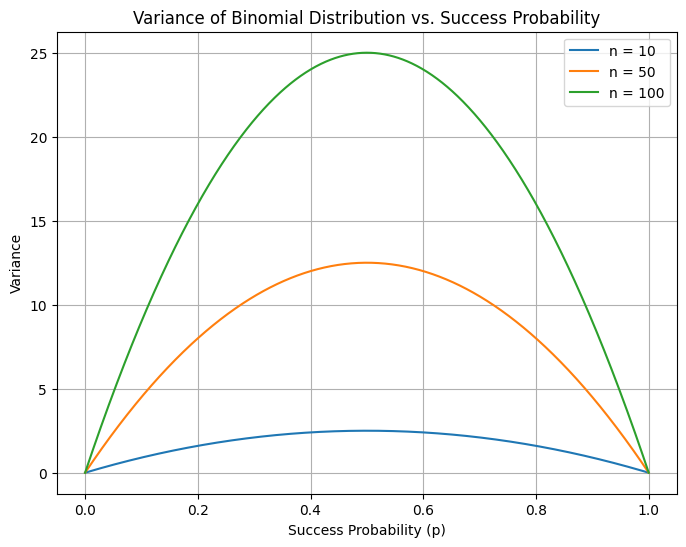

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# p の範囲を 0～1 で定義
p = np.linspace(0, 1, 1000)

# 複数の試行回数 n の値で比較する例
n_values = [10, 50, 100]

plt.figure(figsize=(8, 6))
for n in n_values:
    variance = n * p * (1 - p)
    plt.plot(p, variance, label=f'n = {n}')

plt.xlabel("Success Probability (p)")
plt.ylabel("Variance")
plt.title("Variance of Binomial Distribution vs. Success Probability")
plt.legend()
plt.grid(True)
plt.show()


上のグラフで得られる直観。

- どの試行回数でも、現象の成功確率が0.5の時（ちょうど横軸の中央あたり）、「分散が大きい（縦軸の値が大きい）」。これはコイントスの現象で「表が出る」と「裏が出る」が偏りなく（より分散して）起こることを表す。
- どの試行回数でも、現象の成功確率が極端に高い（0.93など）場合と極端に低い（0.02など）場合は「分散」も小さい、つまり偏って成功回数が多くなる（もしくは成功回数が少なくなる）
- 試行回数$n$が小さいと分散の違いが明確に出にくい（青い平な曲線は成功確率の違いがはっきりと出にくい＝分散しにくい）ことを表している。逆に試行回数が多くなると潜在的に分散が大きくなる成功率0.5が、より明確に分散することが分かる。